In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/credit dataa.csv')

In [ ]:
df.head(20)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
5,35,male,1,free,NaN,NaN,9055,36,education,good
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,35,male,3,rent,little,moderate,6948,36,car,good
8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,28,male,3,own,little,moderate,5234,30,car,bad


### Preprocessing and OverSampling

In [ ]:
df.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [ ]:
# Replace null values with mode for 'Saving accounts' and 'Checking account' columns(Categorical->Mode, Numeric-Mean)
df['Saving accounts'] = df['Saving accounts'].fillna(df['Saving accounts'].mode().iloc[0])
df['Checking account'] = df['Checking account'].fillna(df['Checking account'].mode().iloc[0])

In [ ]:
df.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [ ]:
# Replace 'good' with 1 and 'bad' with 0 in the 'Risk' column
df['Risk'] = df['Risk'].replace({'good': 1, 'bad': 0})
df.head(3)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,49,male,1,own,little,little,2096,12,education,1


In [ ]:
risk_counts = df['Risk'].value_counts()
print(risk_counts)

1    700
0    300
Name: Risk, dtype: int64


In [ ]:
# Separate the rows with '0' and '1' in the 'Risk' column
df_0 = df[df['Risk'] == 0]
df_1 = df[df['Risk'] == 1]

# Calculate the difference in counts between '0' and '1' in the 'Risk' column
count_diff = len(df_1) - len(df_0)

# Duplicate rows with '0' in the 'Risk' column to match the count of '1'
df_0_oversampled = df_0.sample(n=count_diff, replace=True)

# Concatenate the oversampled rows with the original dataframe
df_balanced = pd.concat([df, df_0_oversampled])

# Set the original dataframe to the balanced dataframe
df = df_balanced

# Verify the count of '0' and '1' in the 'Risk' column
risk_counts = df['Risk'].value_counts()
print(risk_counts)

# Display the entire balanced dataframe
pd.set_option('display.max_columns', None)
df.head(5)

1    700
0    700
Name: Risk, dtype: int64


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,49,male,1,own,little,little,2096,12,education,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,0


In [ ]:
df.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

##One Hot, Label encoding and picking top 11 correlated columns.

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Apply one-hot encoding to 'sex', 'housing', and 'purpose' columns
one_hot_cols = ['Sex', 'Housing', 'Purpose']
one_hot_encoded = pd.get_dummies(df[one_hot_cols], drop_first=True)

# Apply label encoding to 'Saving accounts' and 'Checking account' columns
label_cols = ['Saving accounts', 'Checking account']
label_encoder = LabelEncoder()
for col in label_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Concatenate the encoded columns with the original DataFrame
df_encoded = pd.concat([df.drop(one_hot_cols, axis=1), one_hot_encoded], axis=1)

# Print the encoded DataFrame
df_encoded.head(15)

,Age,Job,Saving accounts,Checking account,Credit amount,Duration,Risk,Sex_male,Housing_own,Housing_rent,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,2,0,0,1169,6,1,1,1,0,0,0,0,0,1,0,0
1,22,2,0,1,5951,48,0,0,1,0,0,0,0,0,1,0,0
2,49,1,0,0,2096,12,1,1,1,0,0,0,1,0,0,0,0
3,45,2,0,0,7882,42,1,1,0,0,0,0,0,1,0,0,0
4,53,2,0,0,4870,24,0,1,0,0,1,0,0,0,0,0,0
5,35,1,0,0,9055,36,1,1,0,0,0,0,1,0,0,0,0
6,53,2,2,0,2835,24,1,1,1,0,0,0,0,1,0,0,0
7,35,3,0,1,6948,36,1,1,0,1,1,0,0,0,0,0,0
8,61,1,3,0,3059,12,1,1,1,0,0,0,0,0,1,0,0
9,28,3,0,1,5234,30,0,1,1,0,1,0,0,0,0,0,0


In [ ]:
# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Get the absolute correlation values with respect to 'Risk'
correlation_with_risk = correlation_matrix['Risk'].abs()
# Sort the correlation values in descending order
sorted_correlation = correlation_with_risk.sort_values(ascending=False)
sorted_correlation

Risk                           1.000000
Duration                       0.225581
Credit amount                  0.135913
Housing_own                    0.121251
Saving accounts                0.116865
Purpose_radio/TV               0.103493
Age                            0.098186
Housing_rent                   0.070218
Sex_male                       0.064466
Purpose_education              0.060234
Checking account               0.043289
Purpose_car                    0.037492
Job                            0.026320
Purpose_repairs                0.014563
Purpose_domestic appliances    0.014358
Purpose_vacation/others        0.013440
Purpose_furniture/equipment    0.013289
Name: Risk, dtype: float64

In [ ]:
#Setting threshold as 0.040077

# Select the top 11 strongly correlated columns (excluding 'Risk' itself)
top_11_correlated_columns = sorted_correlation[1:12]

# Get the column names of the top 11 correlated columns
top_11_columns = top_11_correlated_columns.index.tolist()

# Create a new DataFrame with only the selected columns
df_selected_columns = df_encoded[top_11_columns]

# Print the selected columns DataFrame
print(df_selected_columns)


     Duration  Credit amount  Housing_own  Saving accounts  Purpose_radio/TV  \
0           6           1169            1                0                 1   
1          48           5951            1                0                 1   
2          12           2096            1                0                 0   
3          42           7882            0                0                 0   
4          24           4870            0                0                 0   
..        ...            ...          ...              ...               ...   
54         36           2225            0                0                 0   
835        12           1082            1                0                 0   
597        24           4241            1                0                 0   
446        36           1842            1                0                 0   
840        36           5179            1                0                 0   

     Age  Housing_rent  Sex_male  Purpo

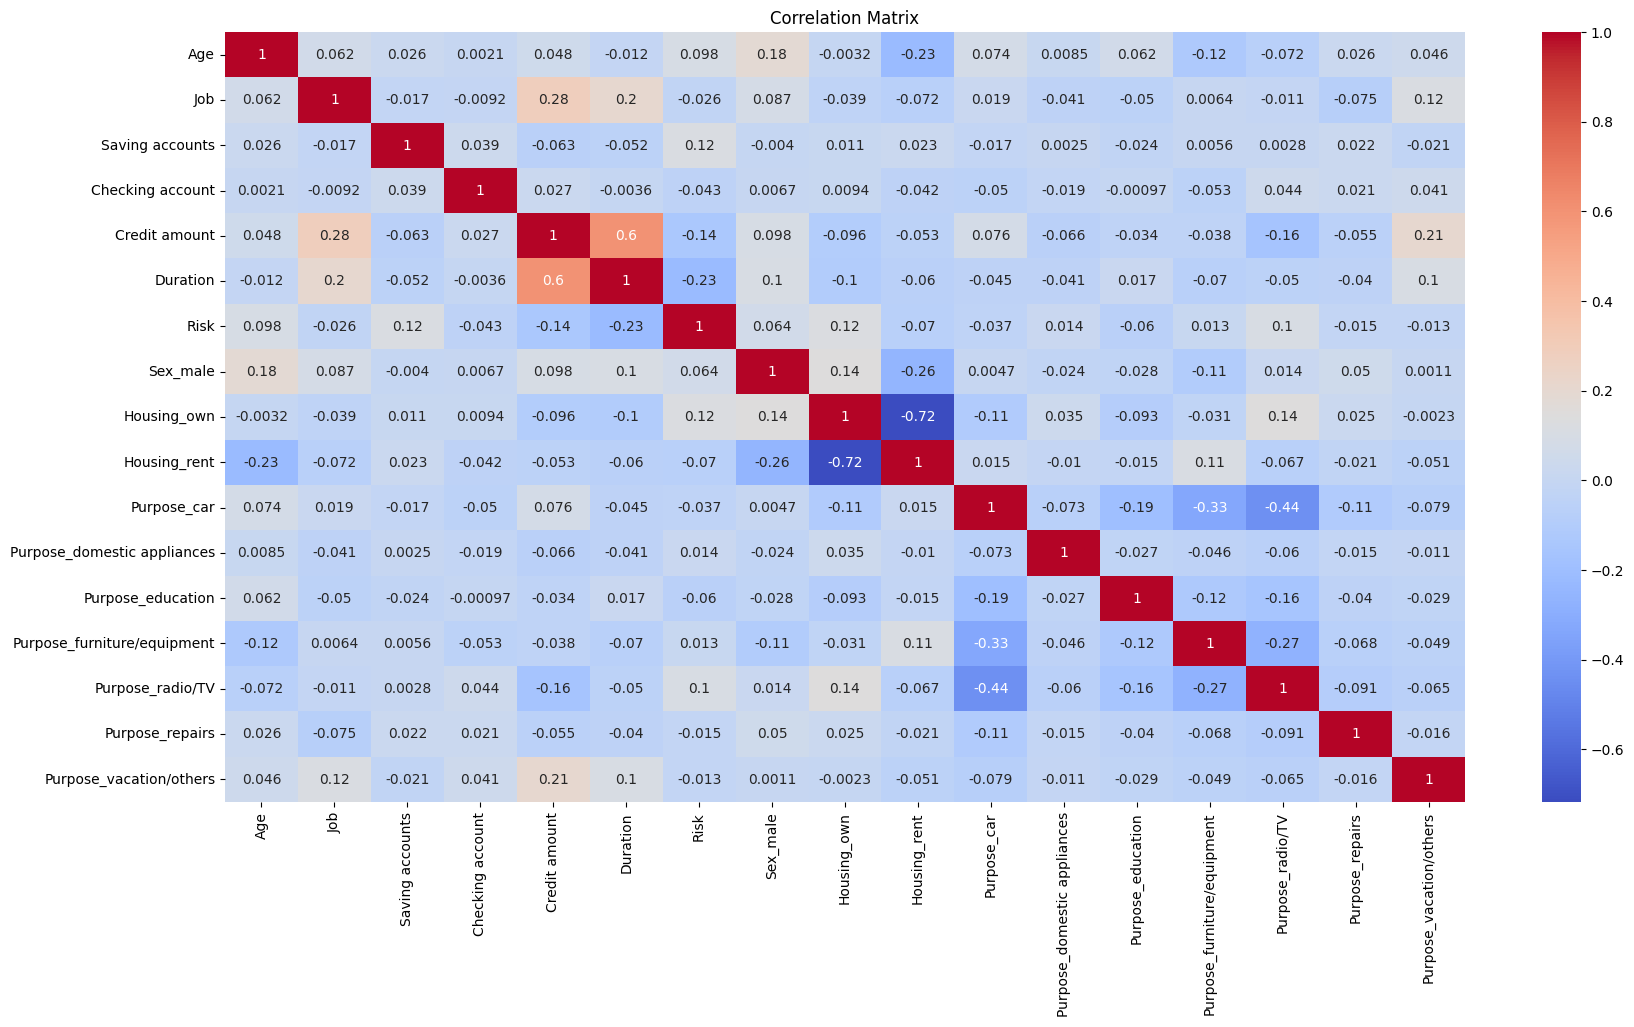

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



# Applying ML Models
---



---



### SVM

Accuracy: 0.6178571428571429
Precision: 0.6009615384615384
Recall: 0.8389261744966443
F1 Score: 0.7002801120448178


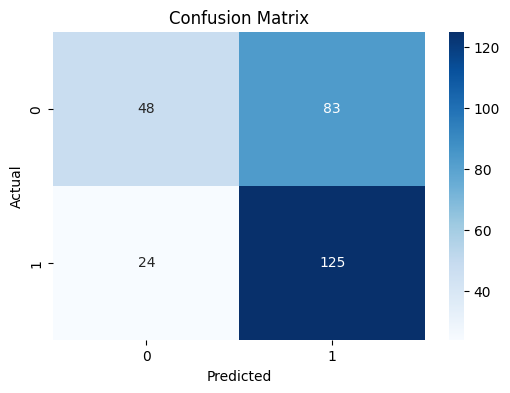

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Separate the features (X) and the target variable (y)
X = df_selected_columns
y = df['Risk']  # Use the 'Risk' column from the original DataFrame

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_classifier = SVC()

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

# Plot a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Ramdom Forest

Accuracy: 0.7857142857142857
Precision: 0.8296296296296296
Recall: 0.7516778523489933
F1 Score: 0.7887323943661972


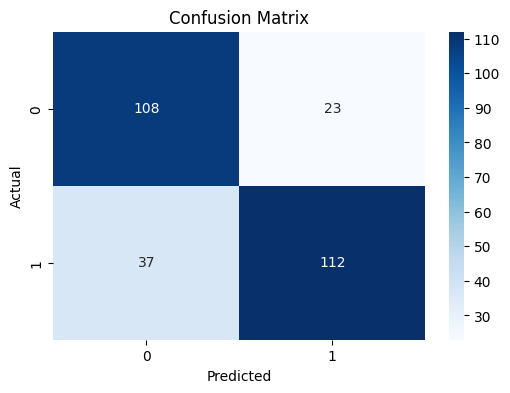

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd


# Separate the features (X) and the target variable (y)
X = df_selected_columns
y = df['Risk']  # Use the 'Risk' column from the original DataFrame

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
random_forest_classifier = RandomForestClassifier()

# Train the classifier on the training data
random_forest_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = random_forest_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

# Reset the index of X_test
X_test = X_test.reset_index(drop=True)

# Plot a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
# Calculate the probabilities for the 'good' class
probabilities = random_forest_classifier.predict_proba(X_test)[:, 1]

# Create a new column 'probability_good' in the original dataframe
df['probability_good'] = pd.Series(probabilities, index=X_test.index)

# Print the modified original dataframe
df.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,probability_good
0,67,male,2,own,0,0,1169,6,radio/TV,1,0.38
1,22,female,2,own,0,1,5951,48,radio/TV,0,0.96
2,49,male,1,own,0,0,2096,12,education,1,0.85
3,45,male,2,free,0,0,7882,42,furniture/equipment,1,0.48
4,53,male,2,free,0,0,4870,24,car,0,0.60
5,35,male,1,free,0,0,9055,36,education,1,0.09
6,53,male,2,own,2,0,2835,24,furniture/equipment,1,0.44
7,35,male,3,rent,0,1,6948,36,car,1,0.70
8,61,male,1,own,3,0,3059,12,radio/TV,1,0.54
9,28,male,3,own,0,1,5234,30,car,0,0.72


### Decision Tree

Accuracy: 0.7928571428571428
Precision: 0.8699186991869918
Recall: 0.7181208053691275
F1 Score: 0.7867647058823529


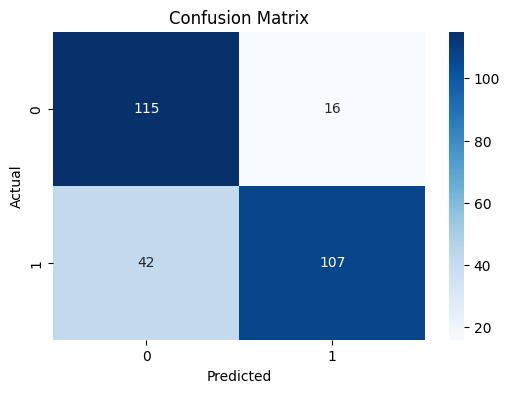

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier
decision_tree = DecisionTreeClassifier()

# Train the classifier on the training data
decision_tree.fit(X_train, y_train)

# Make predictions on the test data
y_pred = decision_tree.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

# Plot a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Gradient Boosting

Accuracy: 0.6892857142857143
Precision: 0.7583333333333333
Recall: 0.610738255033557
F1 Score: 0.6765799256505577


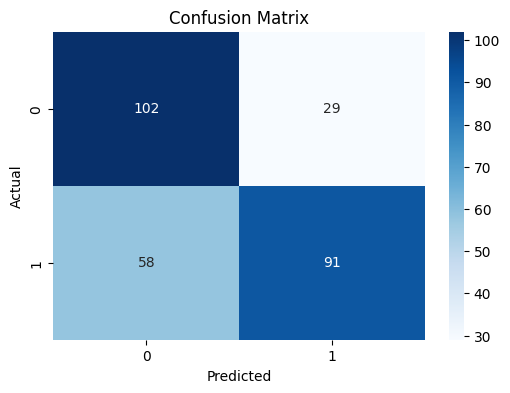

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting Classifier
gradient_boosting = GradientBoostingClassifier()

# Train the classifier on the training data
gradient_boosting.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gradient_boosting.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

# Plot a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### AdaBoostClassifier

Accuracy: 0.6357142857142857
Precision: 0.6910569105691057
Recall: 0.5704697986577181
F1 Score: 0.6249999999999999


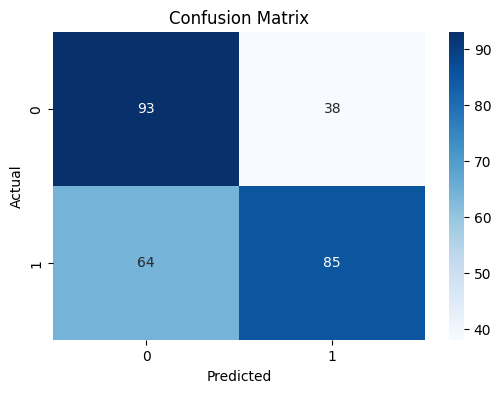

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Create an AdaBoost Classifier
adaboost = AdaBoostClassifier()

# Train the classifier on the training data
adaboost.fit(X_train, y_train)

# Make predictions on the test data
y_pred = adaboost.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

# Plot a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Logistic Regression

Accuracy: 0.6357142857142857
Precision: 0.6620689655172414
Recall: 0.6442953020134228
F1 Score: 0.6530612244897959


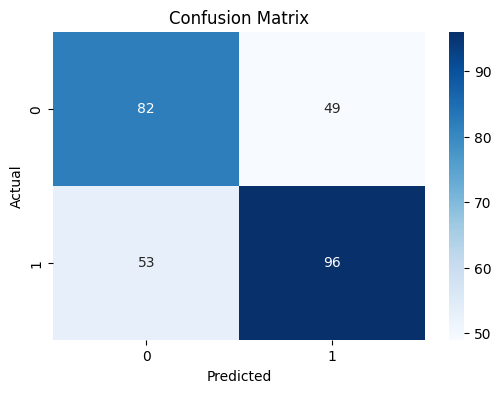

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Separate the features (X) and the target variable (y)
X = df_selected_columns
y = df['Risk']  # Use the 'Risk' column from the original DataFrame

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression classifier
logistic_regression = LogisticRegression()

# Train the classifier on the training data
logistic_regression.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logistic_regression.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

# Plot a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### MLP

Accuracy: 0.5535714285714286
Precision: 0.6428571428571429
Recall: 0.3624161073825503
F1 Score: 0.46351931330472096


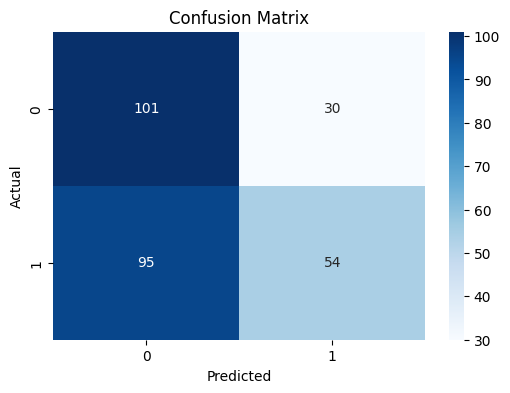

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Separate the features (X) and the target variable (y)
X = df_selected_columns
y = df['Risk']  # Use the 'Risk' column from the original DataFrame

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an MLP classifier
mlp_classifier = MLPClassifier()

# Train the classifier on the training data
mlp_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = mlp_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

# Plot a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### RNN

Epoch 1/10
35/35 [==============================] - 1s 1ms/step - loss: 0.7036 - accuracy: 0.5018
Epoch 2/10
35/35 [==============================] - 0s 1ms/step - loss: 0.6536 - accuracy: 0.6277
Epoch 3/10
35/35 [==============================] - 0s 2ms/step - loss: 0.6337 - accuracy: 0.6384
Epoch 4/10
35/35 [==============================] - 0s 1ms/step - loss: 0.6225 - accuracy: 0.6625
Epoch 5/10
35/35 [==============================] - 0s 1ms/step - loss: 0.6112 - accuracy: 0.6562
Epoch 6/10
35/35 [==============================] - 0s 1ms/step - loss: 0.6004 - accuracy: 0.6714
Epoch 7/10
35/35 [==============================] - 0s 1ms/step - loss: 0.5902 - accuracy: 0.6714
Epoch 8/10
35/35 [==============================] - 0s 1ms/step - loss: 0.5815 - accuracy: 0.6884
Epoch 9/10
35/35 [==============================] - 0s 2ms/step - loss: 0.5737 - accuracy: 0.6973
Epoch 10/10
9/9 [==============================] - 0s 1ms/step
Accuracy: 0.5964285714285714
Precision: 0.6363636363636

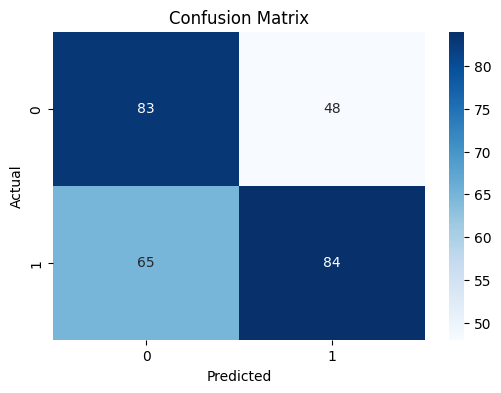

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Separate the features (X) and the target variable (y)
X = df_selected_columns
y = df['Risk']  # Use the 'Risk' column from the original DataFrame

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32)

# Make predictions on the test data
y_pred_prob = model.predict(X_test_scaled)
y_pred = np.where(y_pred_prob >= 0.5, 1, 0)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

# Plot a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
